# 필요한 모듈 및 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from graphviz import Source
from IPython.display import Image

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_curve,f1_score, auc
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import balanced_accuracy_score

sns.set_style("whitegrid")

from IPython.display import display, HTML
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# Decision Tree
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_curve,f1_score, auc

# Bagging
from sklearn.ensemble import BaggingRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Random Forest
import os
from sklearn.ensemble import RandomForestClassifier

# XGboost
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# 데이터 불러오기

In [2]:
data = pd.read_csv("p2p_data.csv")
data.head()

,annual_inc,bc_util,chargeoff_within_12_mths,dti,inq_last_6mths,mths_since_last_delinq,num_accts_ever_120_pd,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,avg_cur_bal,pct_tl_nvr_dlq,revol_bal,total_acc,int_rate,verification_status,home_ownership,term,TARGET
0,53000.0,88.8,0,25.25,0,11,0,0,0,132074,11200,14564,100.0,13780,17,20.49,Source Verified,OWN,60 months,1
1,60000.0,94.4,0,25.88,0,20,1,0,0,68761,6300,5565,87.5,7378,16,12.29,Not Verified,RENT,36 months,0
2,125000.0,82.5,0,10.93,1,77,0,0,0,229006,15000,14929,100.0,14171,41,7.89,Not Verified,RENT,36 months,0
3,90000.0,77.6,0,22.75,0,79,0,0,0,248018,43900,12054,100.0,34073,41,17.57,Verified,MORTGAGE,60 months,0
4,76863.0,43.3,0,19.53,1,34,2,0,0,40792,2400,3816,77.8,1040,20,9.17,Not Verified,MORTGAGE,36 months,0


# 명목형 변수 제거

In [3]:
data = data.drop(['verification_status','home_ownership','term'],axis=1)
data.head()

,annual_inc,bc_util,chargeoff_within_12_mths,dti,inq_last_6mths,mths_since_last_delinq,num_accts_ever_120_pd,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,avg_cur_bal,pct_tl_nvr_dlq,revol_bal,total_acc,int_rate,TARGET
0,53000.0,88.8,0,25.25,0,11,0,0,0,132074,11200,14564,100.0,13780,17,20.49,1
1,60000.0,94.4,0,25.88,0,20,1,0,0,68761,6300,5565,87.5,7378,16,12.29,0
2,125000.0,82.5,0,10.93,1,77,0,0,0,229006,15000,14929,100.0,14171,41,7.89,0
3,90000.0,77.6,0,22.75,0,79,0,0,0,248018,43900,12054,100.0,34073,41,17.57,0
4,76863.0,43.3,0,19.53,1,34,2,0,0,40792,2400,3816,77.8,1040,20,9.17,0


# pairplot을 이용하여 히스토그램 및 산점도 그리기

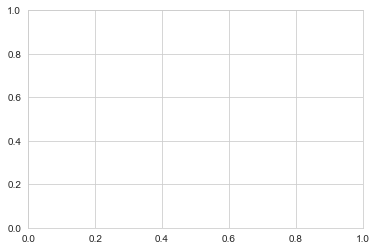

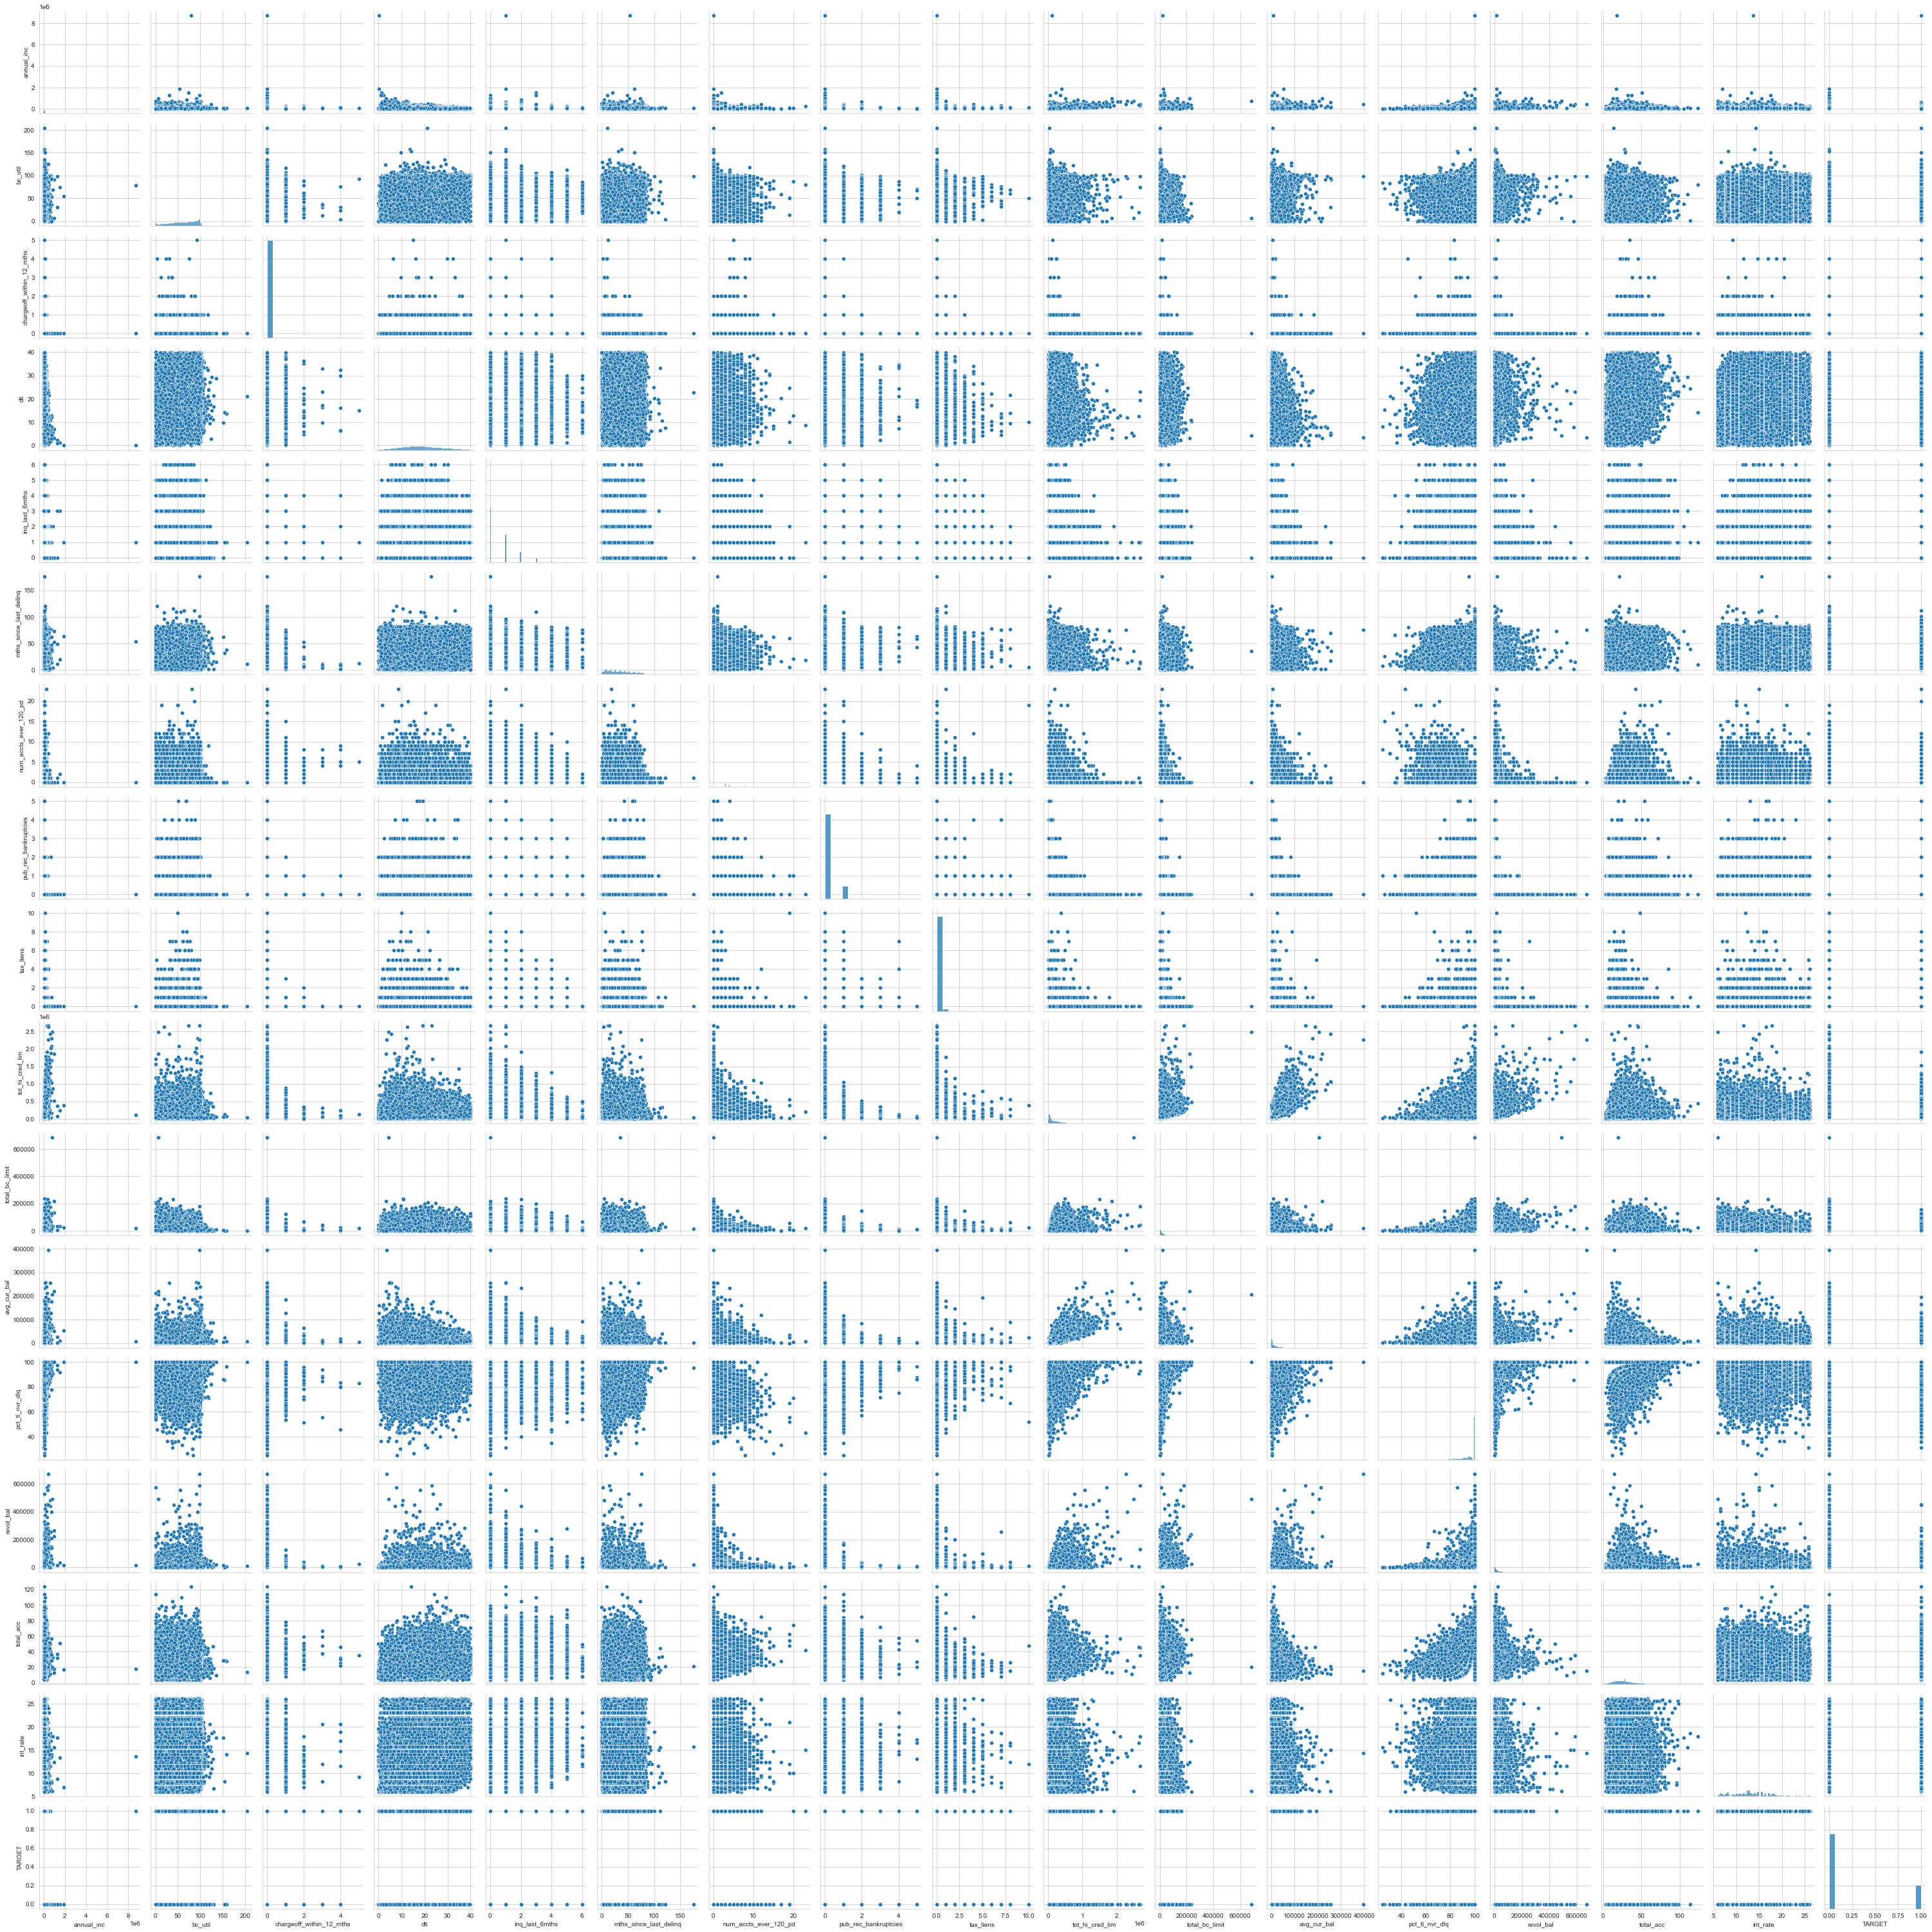

In [4]:
fig, ax = plt.subplots()
sns.pairplot(data = data)
plt.savefig('pairplot.png')

# boxplot을 이용하여 설명변수의 특성 파악

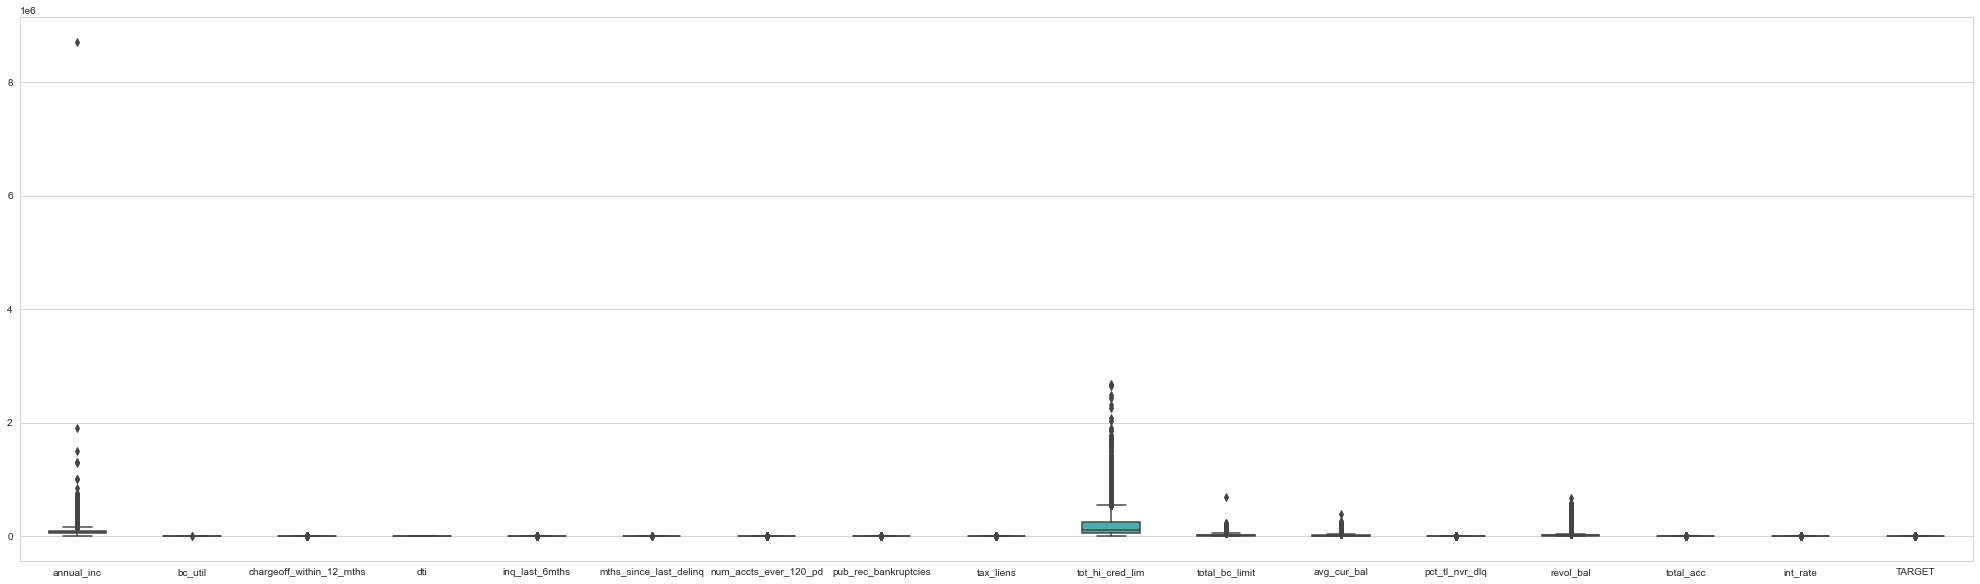

In [5]:
fig, ax = plt.subplots(figsize = (35,10))
boxplot = sns.boxplot(data = data, ax = ax, width = 0.5)
boxplot.tick_params(labelsize = 10)
plt.savefig('boxplot.png')

# Class distribution 확인

C:\Users\tnsgh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


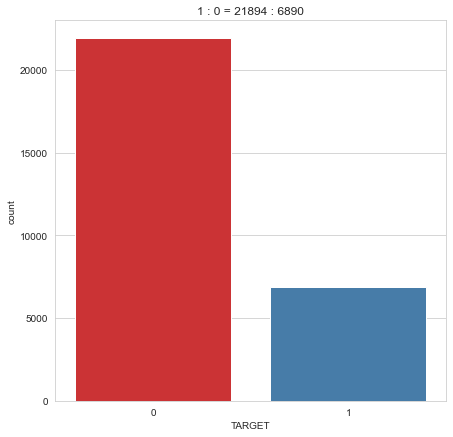

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,7))
sns.countplot(data['TARGET'], palette = 'Set1', ax = ax)
ax.set_title("1 : 0 = {} : {}".format(*data['TARGET'].value_counts()))
plt.show()

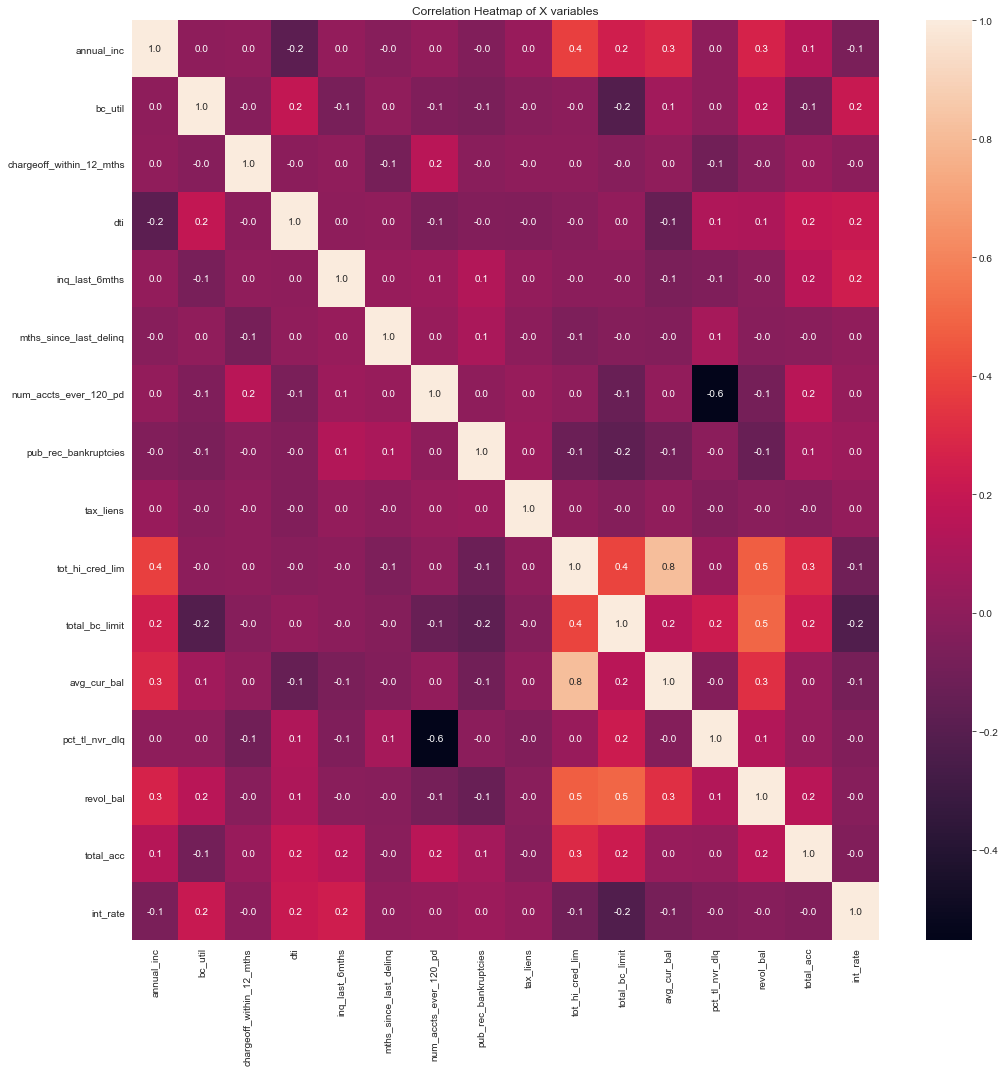

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,15))
ax = sns.heatmap(data.drop(['TARGET'],axis=1).corr(), annot=True, fmt='.1f')
ax.set_title("Correlation Heatmap of X variables")
plt.tight_layout()
plt.show(fig)

# X와 y 분리

In [8]:
y = data['TARGET'].values
X = data.drop('TARGET',axis = 1)
xcolumns = X.columns.values
X = X.values

# 데이터를 8:2로 분할하여 train, test 데이터 구축

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20200618, stratify = y)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state=20160620)

# Evaluation

In [11]:
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = None)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)

print('- Accuracy (Train) : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))

print('- F1 score (Train) : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

print('- precision score(Train) : {:.4}'.format(precision_score(y_train, y_train_pred)))
print('- precision score(Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred)))

print('- recall score (Train) : {:.4}'.format(recall_score(y_train, y_train_pred)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred)))

- Accuracy (Train) : 1.0
- Accuracy (Validation) : 0.6535
- F1 score (Train) : 1.0
- F1 score (Validation) : 0.3085
- precision score(Train) : 1.0
- precision score(Validation) : 0.2954
- recall score (Train) : 1.0
- recall score (Validation) : 0.3228


In [13]:
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
y_train_pred = clf_dt.predict(X_train)
y_valid_pred = clf_dt.predict(X_valid)

print('- Accuracy (Train) : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))

print('- F1 score (Train) : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

print('- precision score(Train) : {:.4}'.format(precision_score(y_train, y_train_pred)))
print('- precision score(Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred)))

print('- recall score (Train) : {:.4}'.format(recall_score(y_train, y_train_pred)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred)))

- Accuracy (Train) : 0.7682
- Accuracy (Validation) : 0.7597
- F1 score (Train) : 0.1487
- F1 score (Validation) : 0.1304
- precision score(Train) : 0.6145
- precision score(Validation) : 0.4882
- recall score (Train) : 0.0846
- recall score (Validation) : 0.07525


In [15]:
y_score_train =clf_dt.predict_proba(X_train)
y_score_valid =clf_dt.predict_proba(X_valid)

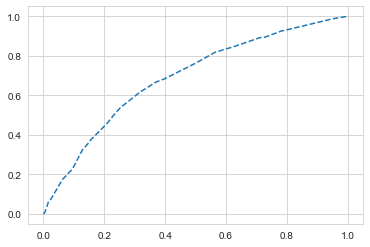

In [16]:
# Show ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, y_score_valid[:,1], pos_label = 1)
plt.plot(fpr, tpr, linestyle='--')

In [17]:
print(auc(fpr,tpr))

0.6891646300321781


In [20]:
max_depths = list(range(1,9,1))
validation_accs = []
validation_f1 = []
dt_models = []
for max_depth in max_depths :
    clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth)
    clf_dt.fit(X_train, y_train)
    dt_models.append(clf_dt)
    y_valid_pred = clf_dt.predict(X_valid)
    validation_accs.append(accuracy_score(y_valid, y_valid_pred))
    validation_f1.append(f1_score(y_valid, y_valid_pred, pos_label = 1))

In [24]:
pred_v=dt_models[1].predict(X_test)
# 균형정확도 계산
print('- balanced_accuracy_score (Test) : {:.4}'.format(balanced_accuracy_score(y_test,pred_v)))

- balanced_accuracy_score (Test) : 0.5


In [25]:
print('- accuracy_score (Test) : {:.4}'.format(accuracy_score(y_test,pred_v)))

- accuracy_score (Test) : 0.7606


In [26]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

NameError: name 'y_test_pred' is not defined

In [27]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns = [1,0])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size':15})

NameError: name 'y_test_pred' is not defined

In [ ]:
print('- balanced_accuracy_score (Test) : {:.4}'.format(balanced_accuracy_score(y_test,pred_v)))

# Visualization

In [ ]:
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               filled=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(max_depths, validation_accs, color = 'red', marker='o', label = 'validation acc')
ax.plot(max_depths, validation_f1, color = 'blue', marker='s', label = 'validation f1')
ax.legend(loc = 'best')
plt.show(fig)

# GridSearch

In [ ]:
base = DecisionTreeClassifier()
opt = {'criterion' : ['entropy'], 'max_depth' : [1,2,3,4,5]}
cv = GridSearchCV(estimator = base, param_grid = opt, cv = 5)
cv_fitted = cv.fit(X_train, y_train)

In [ ]:
cv_fitted.best_params_

In [ ]:
y_train_pred = cv.predict(X_train)
y_valid_pred = cv.predict(X_valid)

print('- Accuracy (Train) : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))

print('- F1 score (Train) : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred)))

print('- precision score(Train) : {:.4}'.format(precision_score(y_train, y_train_pred)))
print('- precision score(Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred)))

print('- recall score (Train) : {:.4}'.format(recall_score(y_train, y_train_pred)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred)))

In [ ]:
y_score_train =cv.predict_proba(X_train)
y_score_valid =cv.predict_proba(X_valid)

# Show ROC Curve
fpr, tpr, thresholds = roc_curve(y_valid, y_score_valid[:,1], pos_label = 1)
plt.plot(fpr, tpr, linestyle='--')

In [ ]:
print(auc(fpr,tpr))

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns = [1,0])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size':15})

In [ ]:
# Best Model에 대한 규칙(시각화)
graph = Source(export_graphviz(clf_dt,
                               out_file=None,
                               filled=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))

In [ ]:
# 변수의 중요도
imp = dt_models[best_model_idx].feature_importances_
imp

# Bagging

In [ ]:
# Bagging
# X와 y 분리
y = data['TARGET'].values
X = data.drop('TARGET',axis = 1)
xcolumns = X.columns.values
X = X.values

In [ ]:
# test data와 train data 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20210618)

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)

In [ ]:
treeBagging = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                               n_estimators = 100)
treeBagging.fit(X_train, y_train)
y_treeBagging = treeBagging.predict(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

In [ ]:
lrBagging = BaggingRegressor(base_estimator = LinearRegression(),
                             n_estimators = 100)
lrBagging.fit(X_train, y_train)
y_lrBagging = lrBagging.predict(X_test)

# Evaluation

In [ ]:
mse_tree = mean_squared_error(y_test, y_tree)
mse_treeBagging = mean_squared_error(y_test, y_treeBagging)
mse_lr = mean_squared_error(y_test, y_lr)
mse_lrBagging = mean_squared_error(y_test, y_lrBagging)

r2_tree = r2_score(y_test, y_tree)
r2_treeBagging = r2_score(y_test, y_treeBagging)
r2_lr = r2_score(y_test, y_lr)
r2_lrBagging = r2_score(y_test, y_lrBagging)

In [ ]:
print('[Tree - Vanila] R-square = {:.2f} | MSE = {:.2f}'.format(r2_tree, mse_tree))
print('[Tree - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_treeBagging, mse_treeBagging))
print('[Linear - Vanila] R-square = {:.2f} | MSE = {:.2f}'.format(r2_lr, mse_lr))
print('[Linear - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_lrBagging, mse_lrBagging))

# Visualization

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_tree, s = 15, alpha = 0.3, color = 'blue', label = 'tree-vanila')
plt.scatter(y_test, y_treeBagging, s = 15, alpha = 0.3, color = 'red', label = 'tree-bagging')
plt.plot(y_test, y_test, alpha = 1.0, lw = 2, color = 'black', label = 'true')
plt.xlabel('true', fontsize = 12)
plt.ylabel('predict', fontsize = 12)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(y_test, y_lr, s = 15, alpha = 0.3, color = 'blue', label = 'tree-vanila')
plt.scatter(y_test, y_lrBagging, s = 15, alpha = 0.3, color = 'red', label = 'tree-bagging')
plt.plot(y_test, y_test, alpha = 1.0, lw = 2, color = 'black', label = 'true')
plt.xlabel('true', fontsize = 12)
plt.ylabel('predict', fontsize = 12)
plt.legend()
plt.show()

In [ ]:
idx = y_test.argsort()
plt.figure(figsize = (10,6))
plt.plot(y_test[idx], color = 'black', alpha = 1.0, label = 'true')
plt.plot(y_tree[idx], color = 'blue', alpha = 0.5, label = 'tree-vanila')
plt.plot(y_treeBagging[idx], color = 'red', alpha = 0.5, label = 'tree-bagging')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(y_test[idx], color = 'black', alpha = 1.0, label = 'true')
plt.plot(y_lr[idx], color = 'blue', alpha = 0.5, label = 'linear-vanila')
plt.plot(y_lrBagging[idx], color = 'red', alpha = 0.5, label = 'linear-bagging')
plt.legend()
plt.show()

# GridSearch

In [ ]:
# Bagging
bg_clf = BaggingClassifier(random_state=20210619)
bg_clf.fit(X_train, y_train)
bg_pred = bg_clf.predict(X_test)
bg_accuracy = accuracy_score(y_test, bg_pred)

param = {'n_estimators' : [100, 500]}
bg_cv = GridSearchCV(bg_clf, param_grid=param, cv=5)
bg_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n',bg_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(bg_cv.best_score_))

# Random Forest

In [ ]:
y = data['TARGET'].values
X = data.drop('TARGET',axis = 1)
xcolumns = X.columns.values
X = X.values

# test data와 train data 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021,stratify=y)

In [ ]:
# Grid Search
rf = RandomForestClassifier(random_state=2021)
param_grid = {'n_estimators' : [100, 200],
              'criterion' : ['gini'],
              'max_depth':[None, 6]}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)

In [ ]:
rf_cv.best_estimator_

In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('[Accuracy] : {:.2f}%'.format(acc*100))

# GridSearch

In [ ]:
# RandomForest
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
RF_pred = RF_clf.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_pred)

param = { 'max_depth' : [2,4],
         'criterion' : ['gini', 'entropy']}
RF_cv = GridSearchCV(RF_clf, param_grid=param, cv=5)
RF_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n',grid_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))

In [ ]:
y_pred = RF_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('[accuracy] : {:.2f}%'.format(acc*100))

In [ ]:
f1_score(y_test, y_pred)

# AdaBoost

In [ ]:
# AdaBoost
ada_clf = AdaBoostClassifier(random_state=20210619)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

param = {'n_estimators' : [100, 500],
        'learning_rate' : [0.05, 0.1]}
ada_cv = GridSearchCV(ada_clf, param_grid=param, cv=5)
ada_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n',ada_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(ada_cv.best_score_))

In [ ]:
y_pred = ada_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('[Accuracy] : {:.2f}%'.format(acc*100))

In [ ]:
# Best Model에 대한 규칙(시각화)
graph = Source(export_graphviz(ada_clf,
                               out_file=None,
                               filled=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))

# Gradient Boosting

In [ ]:
y = data['TARGET'].values
X = data.drop('TARGET',axis = 1)
X = X.values

# test data와 train data 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021)

In [ ]:
gb = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 50)

In [ ]:
xgbr = xgb.XGBRegressor(learning_rate = 0.1, n_estimators = 50, max_depth = 3, reg_lambda=0.1)

In [ ]:
trained_xgb = xgbr.fit(X_train, y_train)
trained_gb = gb.fit(X_train, y_train)

In [ ]:
trained_pred_xgb = trained_xgb.predict(X_train)
trained_pred_gb = trained_gb.predict(X_train)
test_pred_xgb = trained_xgb.predict(X_test)
test_pred_gb = trained_gb.predict(X_test)

In [ ]:
trained_mse_xgb = mean_squared_error(trained_pred_xgb, y_train)
trained_mse_gb = mean_squared_error(trained_pred_gb, y_train)
trained_r2_xgb = r2_score(trained_pred_xgb, y_train)
trained_r2_gb = r2_score(trained_pred_gb, y_train)

test_mse_xgb = mean_squared_error(trained_pred_xgb, y_train)
test_mse_gb = mean_squared_error(trained_pred_gb, y_train)
test_r2_xgb = r2_score(test_pred_xgb, y_test)
test_r2_gb = r2_score(test_pred_gb, y_test)

print('Train MSE : {:.3f} -> {:.3f}'.format(trained_mse_gb, trained_mse_xgb))
print('Train r2 : {:.3f} -> {:.3f}'.format(trained_r2_gb, trained_r2_xgb))
print('Train MSE : {:.3f} -> {:.3f}'.format(test_mse_gb, test_mse_xgb))
print('Train r2 : {:.3f} -> {:.3f}'.format(test_r2_gb, test_r2_xgb))

In [ ]:
# Gradient Boosting
y = data['TARGET'].values
X = data.drop('TARGET',axis = 1)
xcolumns = X.columns.values
X = X.values

# test data와 train data 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2021,stratify=y)

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=20210619)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [ ]:
param = {'n_estimators' : [100, 500],
        'learning_rate' : [0.05, 0.1]}
grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=5)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 : \n',grid_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# DecisionTree
gb_clf = DecisionTreeClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

param = { 'max_depth' : [2,4],
         'criterion' : ['gini', 'entropy']}
grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=5)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n',grid_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# Bagging
bg_clf = BaggingClassifier(random_state=20210619)
bg_clf.fit(X_train, y_train)
bg_pred = bg_clf.predict(X_test)
bg_accuracy = accuracy_score(y_test, bg_pred)

param = {'n_estimators' : [100, 500]}
bg_cv = GridSearchCV(bg_clf, param_grid=param, cv=5)
bg_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n',bg_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(bg_cv.best_score_))